In [1]:
import cv2
from matplotlib import pyplot
import numpy

# Ustawienie rozmarów wyświetlanych obrazów
pyplot.rcParams["figure.figsize"] = (18, 10)

In [2]:
#
# Wczytanie obrazów źródłowych
#
# źródło grafiki colors.jpg: https://unsplash.com/photos/gT5kuls6Y6Q
# źródło grafiki gacław-na-kuchni.jpg: własne
#
image_from_file = cv2.imread('images/colors.jpg')
#image_from_file = cv2.imread('images/gacław-na-kuchni.jpg')
image_gray = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2GRAY)
image_color = cv2.cvtColor(image_from_file, cv2.COLOR_BGR2RGB)
print('Rozmiar obrazka: ', image_from_file.shape)

Rozmiar obrazka:  (750, 1000, 3)


# Zadanie 1

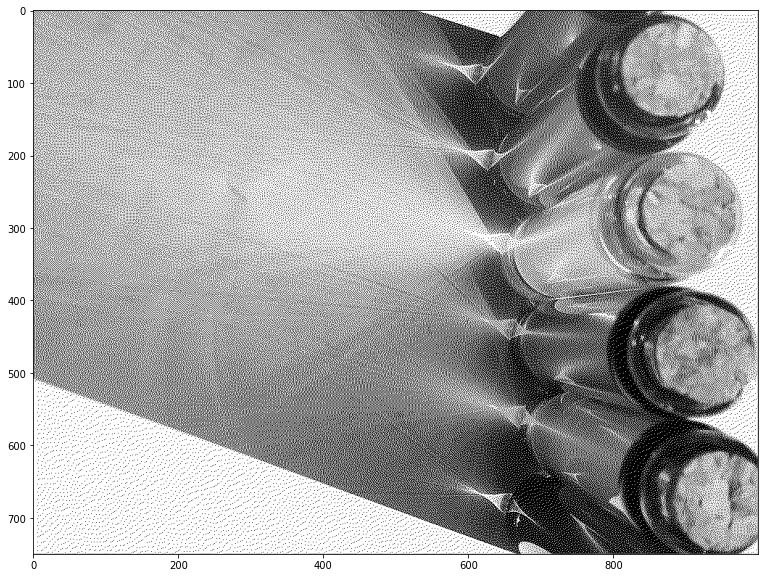

In [3]:
output = numpy.copy(image_gray)


def find_closest_palette_color(pixel):
    return round(pixel / 255) * 255
#
# Algorytm
#
for y in range(1, output.shape[0] - 1):
    for x in range(1, output.shape[1] - 1):
        old_pixel = output[y][x]
        new_pixel = find_closest_palette_color(old_pixel)
        output[y][x] = numpy.clip(new_pixel, 0, 255)
        quant_error = old_pixel - new_pixel
        output[y][x+1] = numpy.clip(output[y][x+1] + quant_error * 7/16, 0, 255)
        output[y+1][x-1] = numpy.clip(output[y+1][x-1] + quant_error * 3/16, 0, 255)
        output[y+1][x] = numpy.clip(output[y+1][x] + quant_error * 5/16, 0, 255)
        output[y+1][x+1] = numpy.clip(output[y+1][x+1] + quant_error * 1/16, 0, 255)


#
# Wyświetlenie
#
pyplot.imshow(output, cmap='gray')

Text(0, 0.5, 'Liczba pikseli obrazu []')

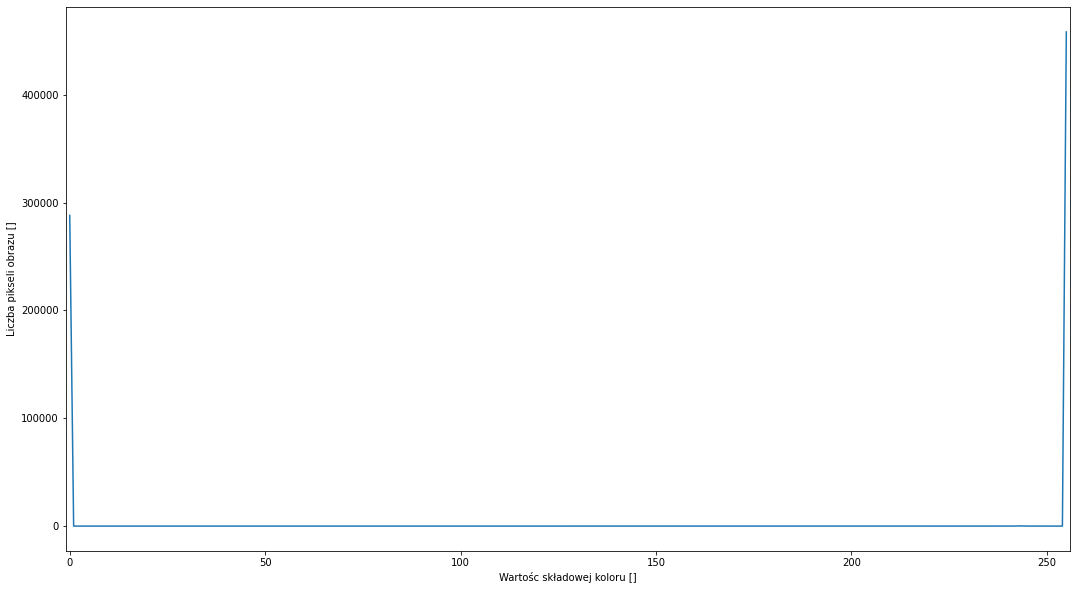

In [4]:
#
# Histogram
#
histr = cv2.calcHist([output], [0], None, [256], [0, 256])
pyplot.plot(histr)
pyplot.xlim([-1, 256])
pyplot.xlabel('Wartośc składowej koloru []')
pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 2

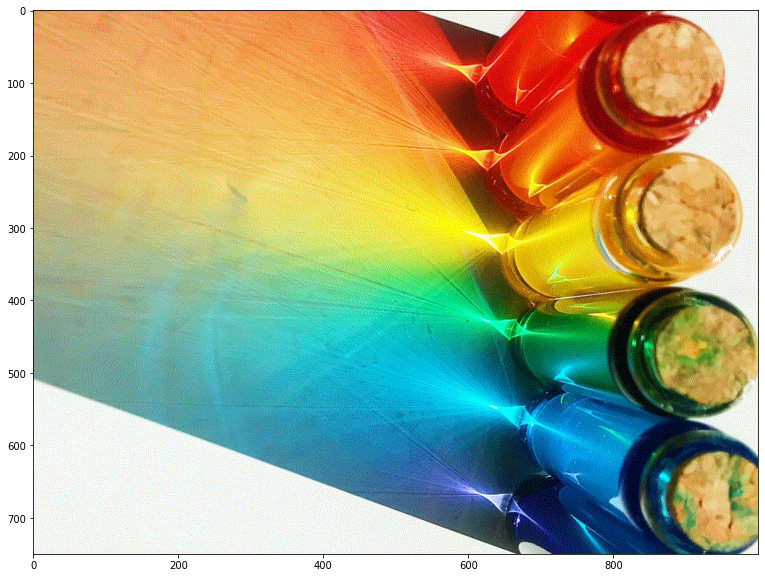

In [5]:
output = numpy.copy(image_color)


def find_closest_palette_color(pixel, k=2):
    return round((k-1) * pixel / 255) * 255 / (k-1)
#
# Algorytm
#
for y in range(1, output.shape[0] - 1):
    for x in range(1, output.shape[1] - 1):
        for c in range(3):
            old_pixel = output[y][x][c]
            new_pixel = find_closest_palette_color(old_pixel, 5)
            output[y][x][c] = numpy.clip(new_pixel, 0, 255)
            quant_error = old_pixel - new_pixel
            output[y][x+1][c] = numpy.clip(output[y][x+1][c] + quant_error * 7/16, 0, 255)
            output[y+1][x-1][c] = numpy.clip(output[y+1][x-1][c] + quant_error * 3/16, 0, 255)
            output[y+1][x][c] = numpy.clip(output[y+1][x][c] + quant_error * 5/16, 0, 255)
            output[y+1][x+1][c] = numpy.clip(output[y+1][x+1][c] + quant_error * 1/16, 0, 255)

#
# Wyświetlenie
#
pyplot.imshow(output)

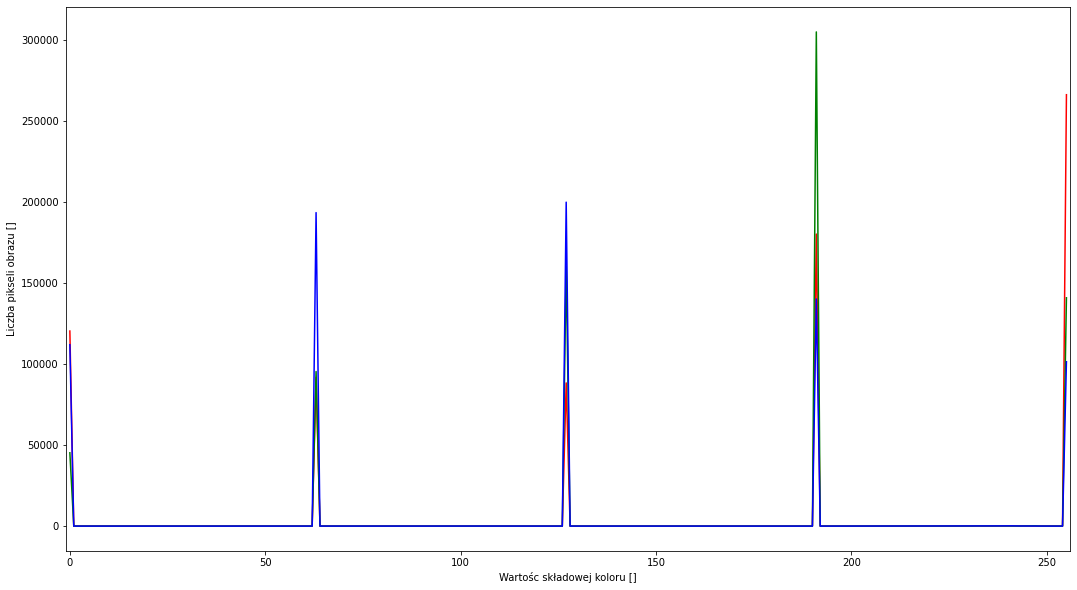

In [6]:
#
# Histogram
#
color = ('r', 'g', 'b')

for i, col in enumerate(color):
    histr = cv2.calcHist([output], [i], None, [256], [0, 256])
    pyplot.plot(histr, color=col)
    pyplot.xlim([-1, 256])
    pyplot.xlabel('Wartośc składowej koloru []')
    pyplot.ylabel('Liczba pikseli obrazu []')

# Zadanie 3

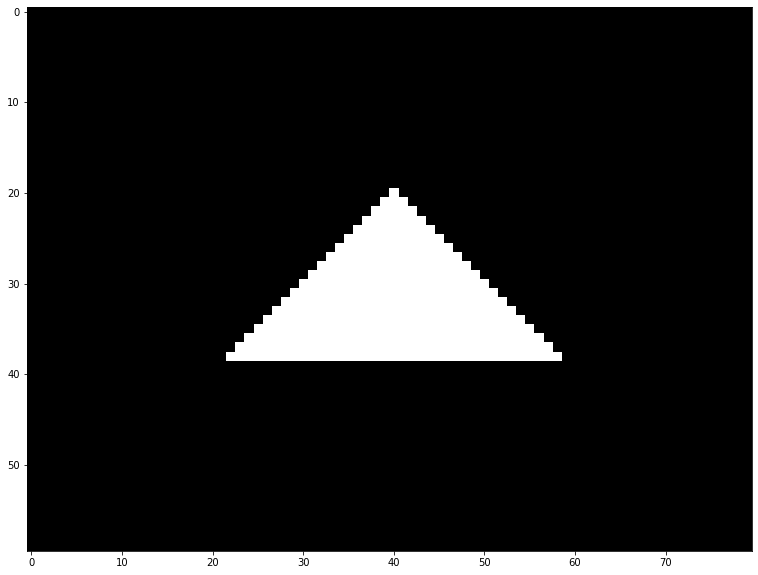

In [7]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    x_d = abs(x1-x2)
    y_d = abs(y1-y2)
    x_i = (x2-x1)/x_d if x_d != 0 else 0
    y_i = (y2-y1)/y_d if y_d != 0 else 0
    d = 2 * y_d - x_d if x_d > y_d else 2 * x_d - y_d

    x = x1
    y = y1
    draw_point(image, x, y)

    while(x != x2):
        if x_d > y_d:
            x += x_i
            d += 2 * y_d
        else:
            y += y_i
            d += 2 * x_d
        if d >= 0:
            if x_d > y_d:
                y += y_i
                d -= 2 * x_d
            else:
                x += x_i
                d -= 2 * y_d
        draw_point(image, int(x), int(y))

def area(a,b,c):
    return (c['x'] - a['x']) * (b['y'] - a['y']) - (c['y'] - a['y']) * (b['x'] - a['x'])

#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    for x in range(width):
        for y in range(height):
            p = {
                "x": x,
                "y": y
            }
            if area(a, b, p) > 0 and area(b, c, p) > 0 and area(c, a, p) > 0:
                draw_point(image, p['x'], p['y'])
            if area(a, b, p) < 0 and area(b, c, p) < 0 and area(c, a, p) < 0:
                draw_point(image, p['x'], p['y'])

a = {
    "x": 20,
    "y": 20
}
b = {
    "x": 60,
    "y": 20
}
c = {
    "x": 40,
    "y": 40
}
#draw_line(image, 20, 20, 50, 40)
draw_triangle(image, a, b, c)
#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 4

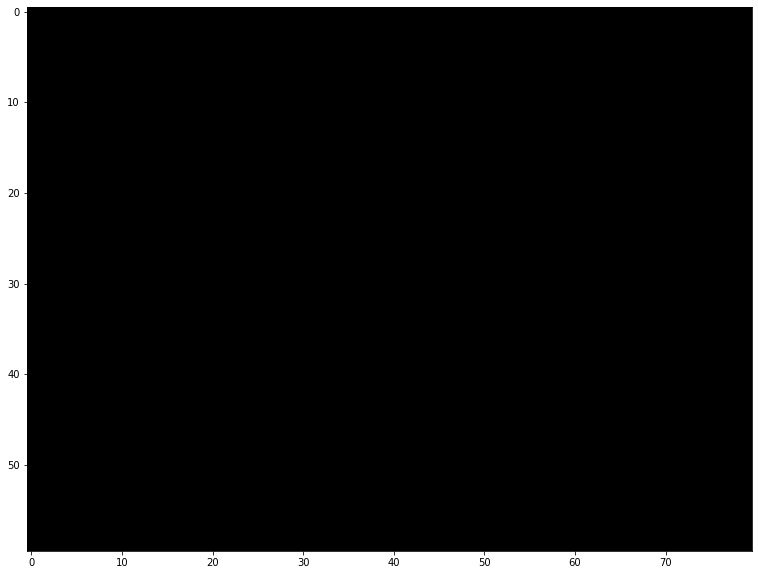

In [8]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    pass  # TODO: implement


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    pass


#
# Rysowanie
#
pass  # TODO: implement

#
# Wyświetlenie
#
pyplot.imshow(image)

# Zadanie 5

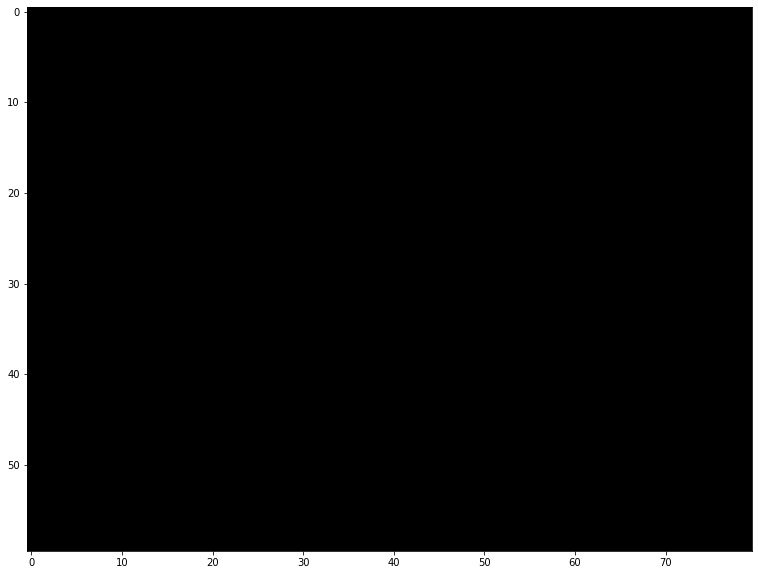

In [9]:
#
# Przygotowanie płótna
#
width = 80
height = 60
image = numpy.zeros((height, width, 3), dtype=numpy.uint8)


#
# Funkcja rysująca punkt
#
# NOTE(sdatko): punkt 0,0 to lewy dolny róg obrazu
#
def draw_point(image, x, y, color=(255, 255, 255)):
    image[image.shape[0] - 1 - y, x, :] = color


#
# Funkcja rysująca linię
#
def draw_line(image, x1, y1, x2, y2):
    pass  # TODO: implement


#
# Funkcja rysująca trójkąt
#
def draw_triangle(image, a, b, c):
    pass  # TODO: implement


#
# Rysowanie
#
pass  # TODO: implement

#
# Wyświetlenie
#
pyplot.imshow(image)